In [256]:
from pandas import read_excel
import datetime as dt
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [257]:
poll = read_excel('http://itpaper.co.kr/data/poll.xlsx', engine='openpyxl')
poll

,일련번호,성별,결혼상태,나이,직업,교육정도,월수입
0,1,1,1,21,1,4,60
1,2,1,1,22,5,5,100
2,3,1,1,33,1,4,200
3,4,2,2,33,7,4,120
4,5,1,2,28,1,4,70
5,6,1,1,21,5,5,80
6,7,2,2,39,7,4,190
7,8,1,1,32,1,4,100
8,9,1,2,44,3,1,120
9,10,1,2,55,4,4,110


In [258]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20, 10)

## 문제1)

In [259]:
df = poll.set_index('일련번호')

# 범주형 변수 (성별, 결혼상태, 직업, 교육정도)
# 연속형 변수 (나이, 월수입)

df.dtypes

성별      int64
결혼상태    int64
나이      int64
직업      int64
교육정도    int64
월수입     int64
dtype: object

In [260]:
df = df.astype({'성별' : 'category', '결혼상태' : 'category', '직업' : 'category', '교육정도' : 'category'})

labels = [{1 : '남자', 2 : '여자'}, {1 : '미혼', 2 : '기혼', 3 : '이혼'}, {1 : '회사원', 2 : '공무원', 3 : '노무자', 4 : '정치가', 5 : '학생', 6 : '기업가', 7 : '주부', 8 : '기타'},{1 : '무학', 2 : '국졸', 3 : '중졸', 4 : '고졸', 5 : '대졸'}]

label_idx = 0
for i,v in enumerate(df):
    if (str(df[v].dtypes)) != 'category':
        continue
    df = df.replace({v : labels[label_idx]})
    label_idx += 1
                     
print(df.dtypes)
df

성별      object
결혼상태    object
나이       int64
직업      object
교육정도    object
월수입      int64
dtype: object


,성별,결혼상태,나이,직업,교육정도,월수입
일련번호,,,,,,
1,남자,미혼,21,회사원,고졸,60
2,남자,미혼,22,학생,대졸,100
3,남자,미혼,33,회사원,고졸,200
4,여자,기혼,33,주부,고졸,120
5,남자,기혼,28,회사원,고졸,70
6,남자,미혼,21,학생,대졸,80
7,여자,기혼,39,주부,고졸,190
8,남자,미혼,32,회사원,고졸,100
9,남자,기혼,44,노무자,무학,120


## 문제2)

,나이,월수입
count,40.000000,40.00000
mean,34.275000,130.22500
std,11.602359,72.19258
min,20.000000,50.00000
25%,24.750000,77.50000
50%,32.000000,105.00000
75%,42.500000,175.00000
max,59.000000,349.00000
위쪽_극단치_경계,69.125000,321.25000
아래쪽_극단치_경계,-1.875000,-68.75000


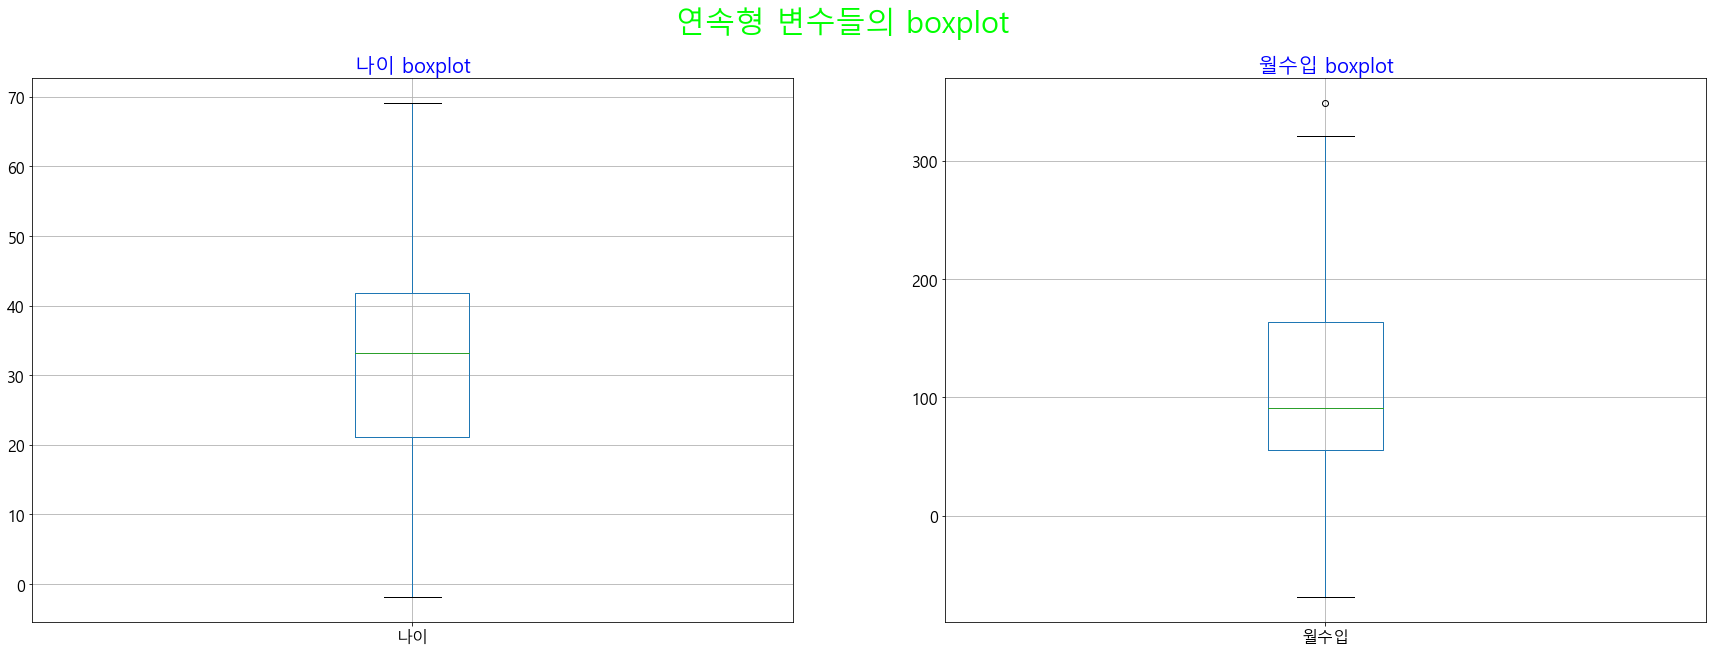

In [261]:
Continue_val_df = df.filter(['나이','월수입'])

ans_df = Continue_val_df.describe()

ans_df.loc['위쪽_극단치_경계'] = ans_df.loc['75%'] + 1.5 * (ans_df.loc['75%'] - ans_df.loc['25%'])
ans_df.loc['아래쪽_극단치_경계'] = ans_df.loc['25%'] - 1.5 * (ans_df.loc['75%'] - ans_df.loc['25%'])

fig, ax = plt.subplots(1,2,figsize = (30,10))
plt.suptitle('연속형 변수들의 boxplot', fontsize = 30, color = '#00ff00')

for i,v in enumerate(ans_df):
    ans_df[v].plot.box(ax = ax[i])
    ax[i].title.set_text('%s boxplot' %v)
    ax[i].title.set_fontsize(20)
    ax[i].title.set_color('#0000ff')
    ax[i].grid()
ans_df

## 문제3)

In [262]:
정제규칙 = SimpleImputer(missing_values = np.nan, strategy="most_frequent")

나이_위쪽_경계, 월수입_위쪽_경계 = ans_df.loc['위쪽_극단치_경계']
나이_아래쪽_경계, 월수입_아래쪽_경계 = ans_df.loc['아래쪽_극단치_경계']


for i in Continue_val_df:

    if df.query("%s >= @%s_위쪽_경계" %(i, i)).empty == False:
        tmp = df.query("%s >= @%s_위쪽_경계" %(i, i))
        tmp[i] = np.nan
        for j in tmp.index:
            Continue_val_df.loc[j] = tmp.loc[j]
    if df.query("%s <= @%s_아래쪽_경계" %(i, i)).empty == False:
        tmp = df.query("%s >= @%s_위쪽_경계" %(i, i))
        tmp[i] = np.nan
        for j in tmp.index:
            Continue_val_df.loc[j] = tmp.loc[j]
            

정제적용df = pd.DataFrame(정제규칙.fit_transform(Continue_val_df.values),index = Continue_val_df.index , columns = Continue_val_df.columns)
정제적용df



<ipython-input-262-5d80d0cd9a93>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp[i] = np.nan


,나이,월수입
일련번호,,
1,21.0,60.0
2,22.0,100.0
3,33.0,200.0
4,33.0,120.0
5,28.0,70.0
6,21.0,80.0
7,39.0,190.0
8,32.0,100.0
9,44.0,120.0


## 문제4)

    성별
남자  27
여자  13
    결혼상태
기혼    23
미혼    15
이혼     2
     직업
회사원  12
기업가   7
주부    6
학생    5
노무자   5
정치가   3
기타    1
공무원   1
    교육정도
고졸    19
대졸    16
중졸     3
무학     1
국졸     1


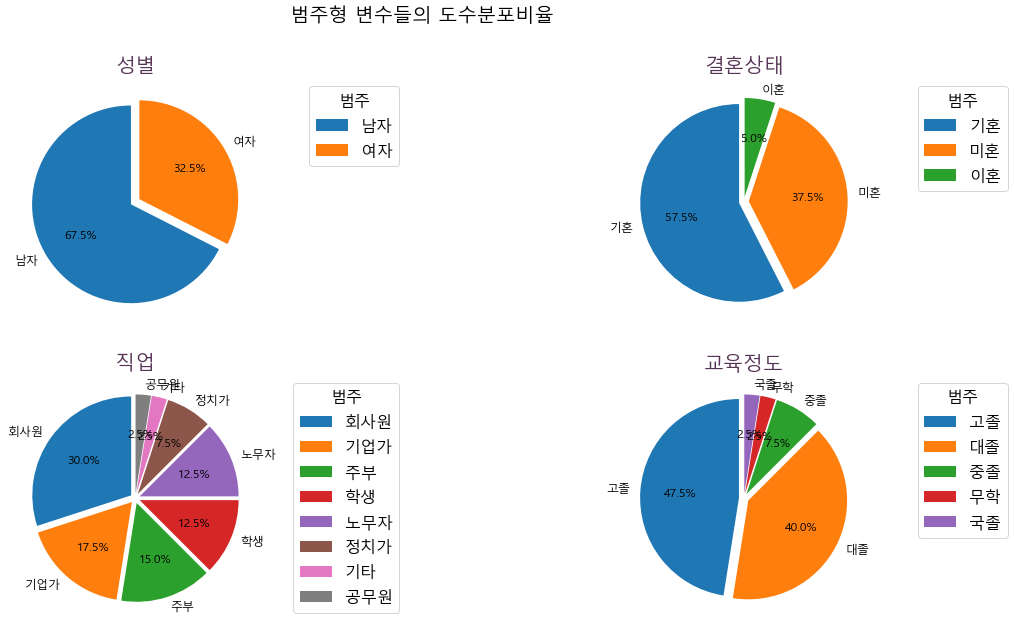

In [270]:
성별_도수분포 = df['성별'].value_counts()
결혼상태_도수분포 = df['결혼상태'].value_counts()
직업_도수분포 = df['직업'].value_counts()
교육정도_도수분포 = df['교육정도'].value_counts()

도수분포_list = [성별_도수분포,결혼상태_도수분포,직업_도수분포,교육정도_도수분포]

for i in 도수분포_list:
    print(pd.DataFrame(i))

fig, ax = plt.subplots(2,2)
plt.suptitle('범주형 변수들의 도수분포비율')
ax = ax.ravel()

for i,v in enumerate(ax):
    tmp = []
    for j in range(0, len(도수분포_list[i])):
        tmp.append(0.05)
    도수분포_list[i].plot.pie(ax = v,startangle = 90, autopct='%0.1f%%', textprops={'color': '#000000','fontsize': 12},shadow = False, explode = tmp)
    ax[i].title.set_text('%s' %도수분포_list[i].name)
    ax[i].title.set_color('#553355')
    ax[i].title.set_fontsize(20)
    ax[i].set_ylabel(None)
    ax[i].legend(title = '범주', bbox_to_anchor=(1.6,1))


## 문제5)

[ 0  0 17 10  8  5]


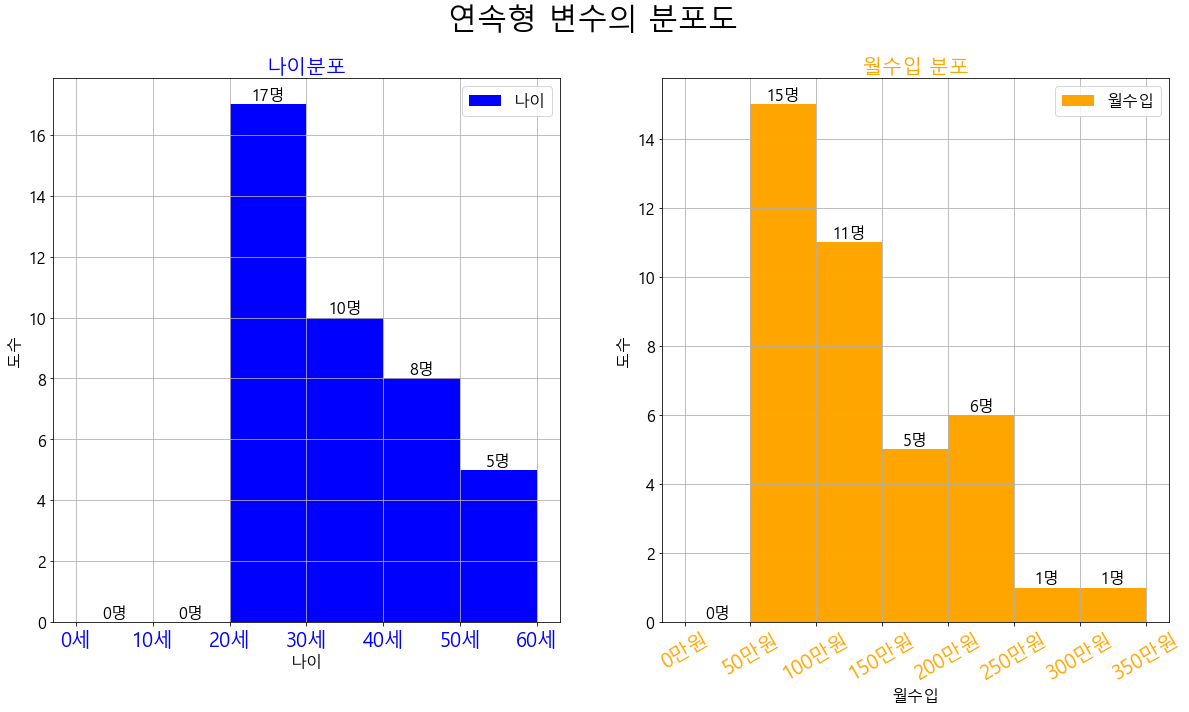

In [264]:
fig,ax = plt.subplots(1,2)

plt.suptitle('연속형 변수의 분포도', fontsize = 30, color = 'black')

Continue_val_df['나이'].plot.hist(ax =ax[0], range = (0,60), bins = 6, color = 'blue')

# 도수를 구하기 위함
count,division = np.histogram(Continue_val_df['나이'],range = (0,60), bins = 6)
print(count)

ax[0].grid()
ax[0].set_xlabel('나이')
ax[0].set_ylabel('도수')
ax[0].title.set_text('나이분포')
ax[0].title.set_fontsize(20)
ax[0].title.set_color('blue')
ax[0].legend()

xlabel = []
for i in np.arange(0, 70, 10):
    xlabel.append('%d세' %i)
ax[0].set_xticks(np.arange(0, 70, 10))
ax[0].set_xticklabels(xlabel, fontsize = 20, color='#0000ff')

for i,v in enumerate(count):
    txt = '%d명' %v
    ax[0].text(division[i] + 5,v,txt, horizontalalignment = 'center', verticalalignment = 'bottom')
        
        
Continue_val_df['월수입'].plot.hist(ax =ax[1], range = (0,350), bins = 7, rot = 30, color = 'orange')

# 도수를 구하기 위함
count,division = np.histogram(Continue_val_df['월수입'],range = (0,350), bins = 7)

ax[1].grid()
ax[1].set_xlabel('월수입')
ax[1].set_ylabel('도수')
ax[1].title.set_text('월수입 분포')
ax[1].title.set_fontsize(20)
ax[1].title.set_color('orange')
ax[1].legend()

xlabel = []
for i in np.arange(0, 400, 50):
    xlabel.append('%d만원' %i)
ax[1].set_xticks(np.arange(0, 400, 50))
ax[1].set_xticklabels(xlabel, fontsize = 20, color='orange')

for i,v in enumerate(count):
    txt = '%d명' %v
    ax[1].text(division[i] + 25,v,txt, horizontalalignment = 'center', verticalalignment = 'bottom')

## 문제6)

In [265]:
pv = pd.pivot_table(df, index = '결혼상태', columns='성별', values='월수입', aggfunc = [np.mean, np.std])
pv

mean                std           
성별            남자      여자         남자         여자
결혼상태                                          
기혼    145.266667  168.75  75.765113  76.239753
미혼     90.000000   70.00  42.163702  21.213203
이혼    215.000000     NaN  21.213203        NaN

## 문제7)

성별,남자,여자
나이대,,
20,75.454545,68.333333
30,152.500000,155.000000
40,142.500000,207.500000
50,222.250000,150.000000


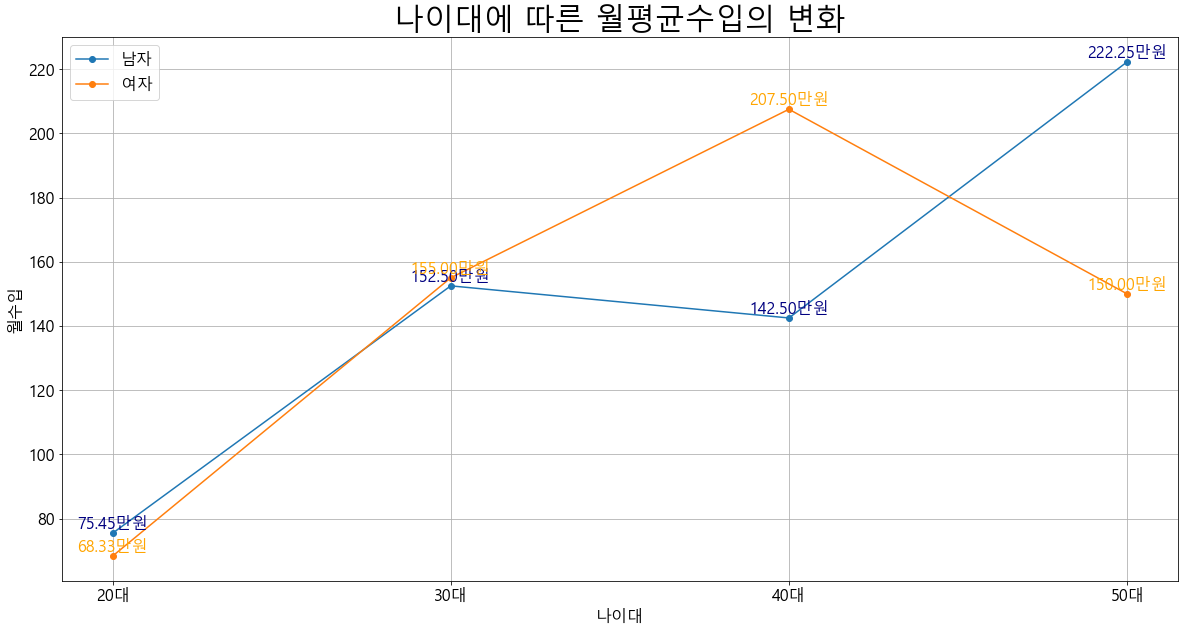

In [266]:
df['나이대'] = df['나이']//10 * 10

pv = pd.pivot_table(df, index = '나이대', columns='성별', values='월수입', aggfunc = np.mean)

pv.plot(marker = 'o')
plt.title('나이대에 따른 월평균수입의 변화', fontsize = 30)
plt.grid()
plt.legend()
plt.ylabel('월수입')

xlabel = []
for i in pv.index:
    xlabel.append('%d대' %i)
plt.xticks(pv.index, xlabel)

for i,v in enumerate(pv['남자']):
    txt = '%0.2f만원' %v
    plt.text(pv.index[i],v,txt, horizontalalignment = 'center', verticalalignment = 'bottom', color = 'navy')
for i,v in enumerate(pv['여자']):
    txt = '%0.2f만원' %v
    plt.text(pv.index[i],v,txt, horizontalalignment = 'center', verticalalignment = 'bottom', color = 'orange')
pv

## 문제8)

Text(0.5, 0, '교육수준')

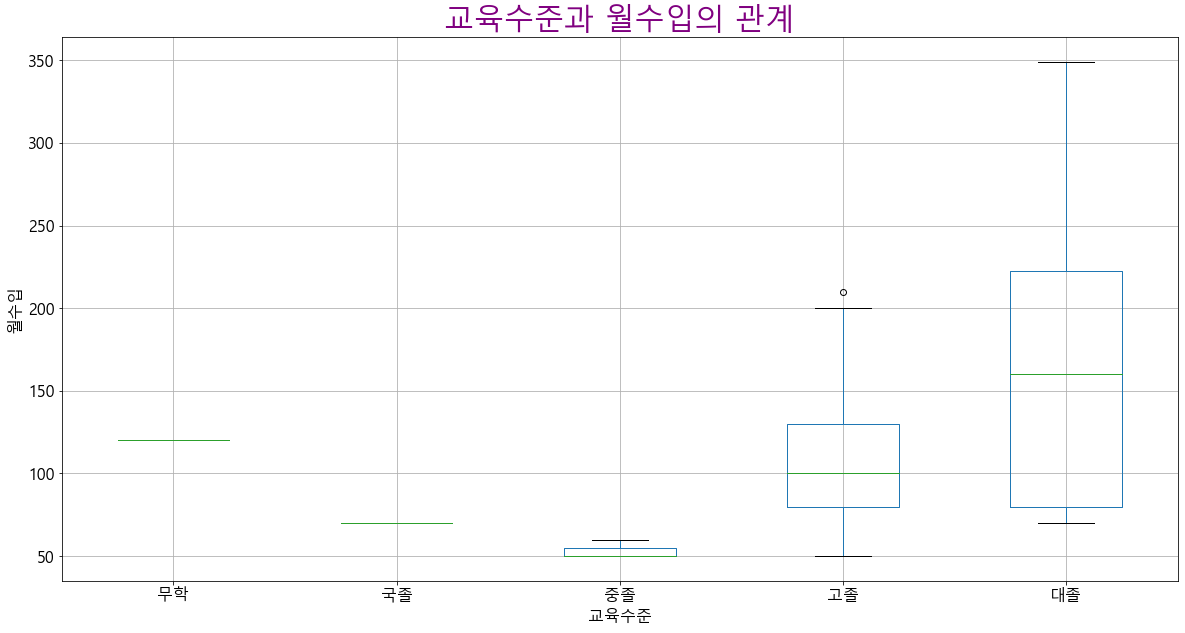

In [267]:
# 범주형 변수와 연속형 변수 사이의 관계이므로 산점도그래프보다 box플롯을 병렬로 나타내는게 좋다고 판단

pv = pd.pivot_table(df, index = df.index, columns = '교육정도',values = '월수입')
pv = pv[['무학', '국졸', '중졸', '고졸', '대졸']]

pv.boxplot()
plt.title('교육수준과 월수입의 관계',fontsize = 30, color = 'purple')
plt.ylabel('월수입')
plt.xlabel('교육수준')


## 문제9)

Text(30, 150, 'f(x)=-15.986481x+4.265835')

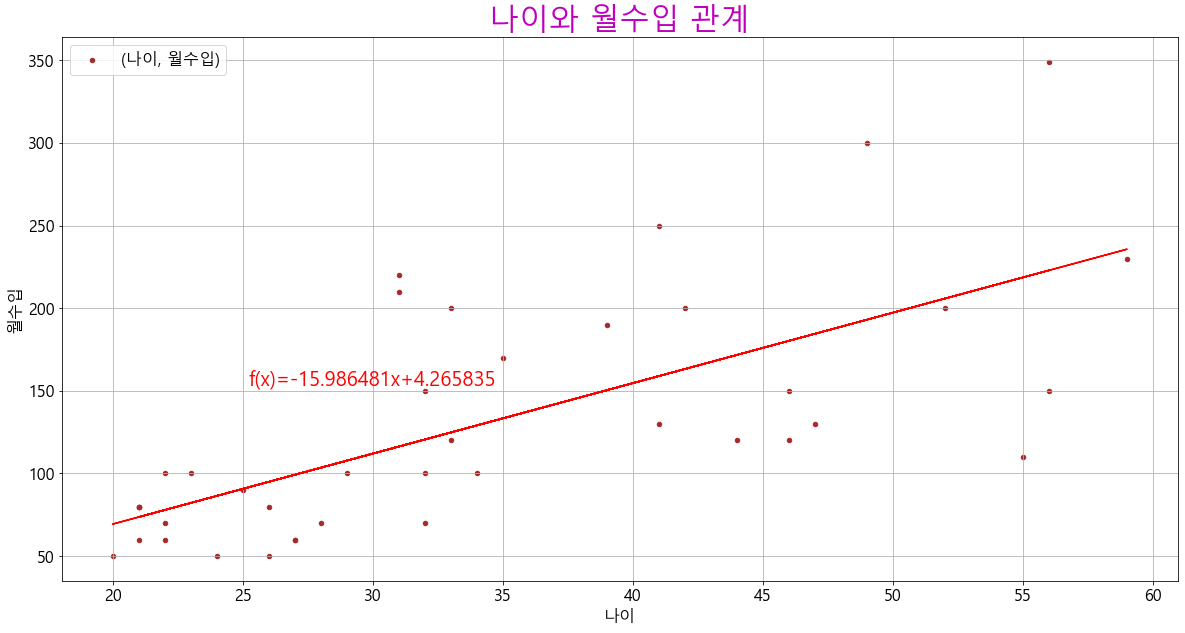

In [268]:
df.plot.scatter(x = '나이',y = '월수입', color = 'brown') 

plt.title('나이와 월수입 관계', fontsize = 30, color = 'm')
plt.grid()
plt.legend(labels = ['(나이, 월수입)'])

x = df['나이']
y = df['월수입']
z = np.polyfit(x, y, 1)   # (X,Y,차원) 정의
f = np.poly1d(z)

plt.plot(x,f(x),'#ff0000')         # 추세선

plt.text(30, 150, "f(x)=%fx+%f" % (f[0], f[1]), fontsize=20, color='#ff0000', 
                    horizontalalignment='center', verticalalignment='bottom')